# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


In [4]:
cities

['punta arenas',
 'faanui',
 'amberley',
 'rikitea',
 'yellowknife',
 'cape town',
 'sao joao da barra',
 'usevya',
 'airai',
 'busselton',
 'urdoma',
 'petropavlovsk-kamchatskiy',
 'katsuura',
 'belushya guba',
 'karratha',
 'ozinki',
 'bluff',
 'taoudenni',
 'clyde river',
 'nizhneyansk',
 'amahai',
 'candawaga',
 'thompson',
 'vaitupu',
 'souillac',
 'port-cartier',
 'dehui',
 'geraldton',
 'bambous virieux',
 'hermanus',
 'puerto escondido',
 'oro valley',
 'saint-pierre',
 'ponta do sol',
 'louisbourg',
 'san quintin',
 'avarua',
 'vaini',
 'ribeira grande',
 'brumado',
 'rognac',
 'ancud',
 'mys shmidta',
 'taolanaro',
 'barawe',
 'hobart',
 'lata',
 'atuona',
 'dillon',
 'ushuaia',
 'punta',
 'kjollefjord',
 'chuy',
 'mackay',
 'vinderup',
 'guarapari',
 'qaanaaq',
 'nome',
 'mahebourg',
 'lala',
 'baculin',
 'kant',
 'san policarpo',
 'makakilo city',
 'provideniya',
 'pali',
 'diffa',
 'albany',
 'palafrugell',
 'severo-kurilsk',
 'kahului',
 'lazarev',
 'yulara',
 'amderma',


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=rahway")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=6f4b7c15dab35e8e2245c7d6b88b84d3&q=rahway


In [6]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | santa fe
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | shenjiamen
Processing Record 8 of Set 1 | rodrigues alves
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | estevan
Processing Record 11 of Set 1 | udimskiy
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | chibuto
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | barbar
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | te anau
Processing Record 19 of Set 1 | muladbucad
Processing Record 20 of Set 1 | sisimiut
Processing Record 21 of Set 1 | kl

Processing Record 39 of Set 4 | zatoka
Processing Record 40 of Set 4 | jacareacanga
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | vestmannaeyjar
Processing Record 43 of Set 4 | sladkovo
Processing Record 44 of Set 4 | malpura
Processing Record 45 of Set 4 | ambilobe
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | isangel
Processing Record 49 of Set 4 | yamada
Processing Record 0 of Set 5 | holme
Processing Record 1 of Set 5 | north bend
Processing Record 2 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 5 | batagay-alyta
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | barrow
Processing Record 6 of Set 5 | tuktoyaktuk
Processing Record 7 of Set 5 | bajo baudo
City not found. Skipping...
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | shar
Processing Record 10 of Set 5 | port moresby
Processing Record 11 of Set 5 |

Processing Record 31 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 32 of Set 8 | tanout
Processing Record 33 of Set 8 | tawkar
City not found. Skipping...
Processing Record 34 of Set 8 | kingsville
Processing Record 35 of Set 8 | jaque
Processing Record 36 of Set 8 | tuatapere
Processing Record 37 of Set 8 | gweta
Processing Record 38 of Set 8 | shelburne
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | cam ranh
Processing Record 41 of Set 8 | otane
Processing Record 42 of Set 8 | awbari
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | miles city
Processing Record 45 of Set 8 | namie
Processing Record 46 of Set 8 | khorramshahr
Processing Record 47 of Set 8 | aksu
Processing Record 48 of Set 8 | la ronge
Processing Record 49 of Set 8 | hualmay
Processing Record 0 of Set 9 | macau
Processing Record 1 of Set 9 | guerrero negro
Processing Record 2 of Set 9 | tigre
Processing Record 3 of Set 9 | port macquarie
Processing R

Processing Record 18 of Set 12 | beira
Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | sioux lookout
Processing Record 21 of Set 12 | azimur
City not found. Skipping...
Processing Record 22 of Set 12 | rioja
Processing Record 23 of Set 12 | natal
Processing Record 24 of Set 12 | taos
Processing Record 25 of Set 12 | pontianak
Processing Record 26 of Set 12 | lakselv
Processing Record 27 of Set 12 | whitianga
Processing Record 28 of Set 12 | abha
Processing Record 29 of Set 12 | warangal
Processing Record 30 of Set 12 | yanam
Processing Record 31 of Set 12 | san andres
Processing Record 32 of Set 12 | santo antonio do ica
Processing Record 33 of Set 12 | beberibe
Processing Record 34 of Set 12 | morondava
Processing Record 35 of Set 12 | tilichiki
Processing Record 36 of Set 12 | marystown
Processing Record 37 of Set 12 | wahiawa
Processing Record 38 of Set 12 | kerch
Processing Record 39 of Set 12 | muisne
Processing Record 40 of Set 12 | makakilo city
Proces

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,21.58,63,1,8.18,ZA,1675877327
1,santa fe,-31.6333,-60.7000,41.12,13,52,2.24,AR,1675877342
2,rikitea,-23.1203,-134.9692,26.16,75,4,6.11,PF,1675877283
3,tasiilaq,65.6145,-37.6368,-15.91,54,0,4.65,GL,1675877429
4,busselton,-33.6500,115.3333,15.97,85,0,5.17,AU,1675877283


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,21.58,63,1,8.18,ZA,1675877327
1,santa fe,-31.6333,-60.7000,41.12,13,52,2.24,AR,1675877342
2,rikitea,-23.1203,-134.9692,26.16,75,4,6.11,PF,1675877283
3,tasiilaq,65.6145,-37.6368,-15.91,54,0,4.65,GL,1675877429
4,busselton,-33.6500,115.3333,15.97,85,0,5.17,AU,1675877283


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

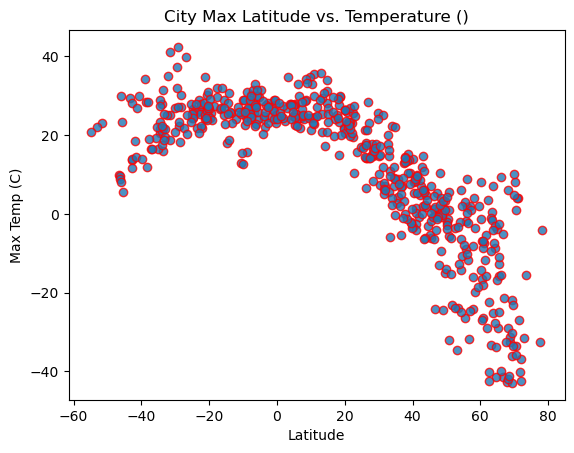

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ()")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

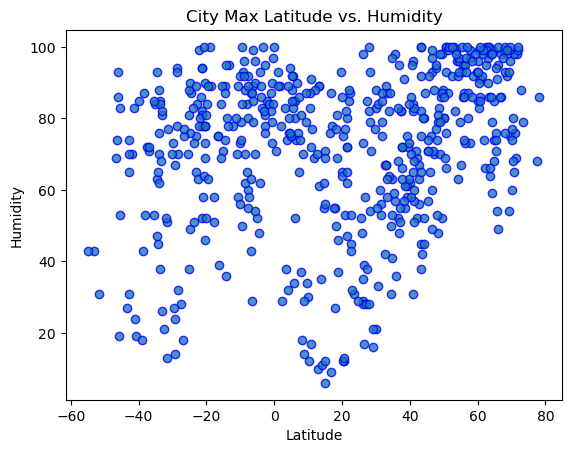

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="blue",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

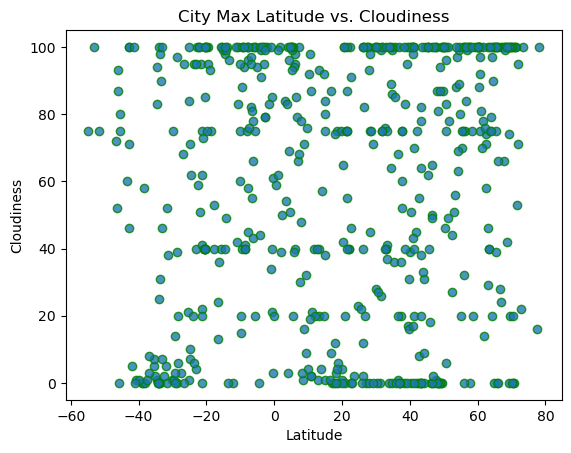

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="green",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

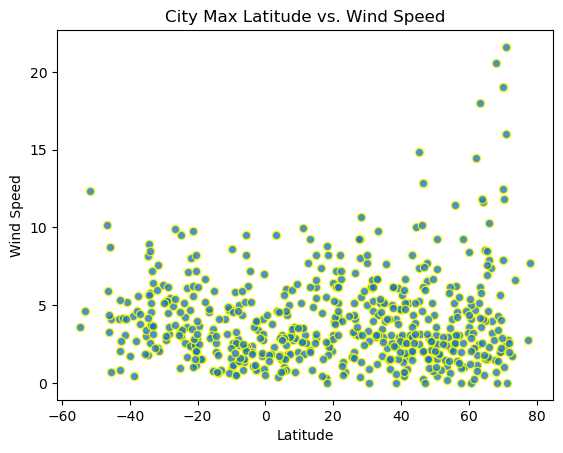

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"   
)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    #Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_equation = f"y = {round(slope, 2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_equation, text_coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"THe r-value is {rvalue ** 2}")
    plt.show()
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tasiilaq,65.6145,-37.6368,-15.91,54,0,4.65,GL,1675877429
5,shenjiamen,29.9576,122.2980,10.18,83,100,4.99,CN,1675877434
7,estevan,49.1334,-102.9842,1.23,86,0,5.14,CA,1675877440
8,udimskiy,61.1417,45.9144,-7.52,99,81,2.15,RU,1675877442
9,port blair,11.6667,92.7500,27.02,69,40,3.09,IN,1675877443


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,21.58,63,1,8.18,ZA,1675877327
1,santa fe,-31.6333,-60.7000,41.12,13,52,2.24,AR,1675877342
2,rikitea,-23.1203,-134.9692,26.16,75,4,6.11,PF,1675877283
4,busselton,-33.6500,115.3333,15.97,85,0,5.17,AU,1675877283
6,rodrigues alves,-7.7380,-72.6509,30.11,60,45,2.42,BR,1675877437


###  Temperature vs. Latitude Linear Regression Plot

THe r-value is 0.7400961301345625


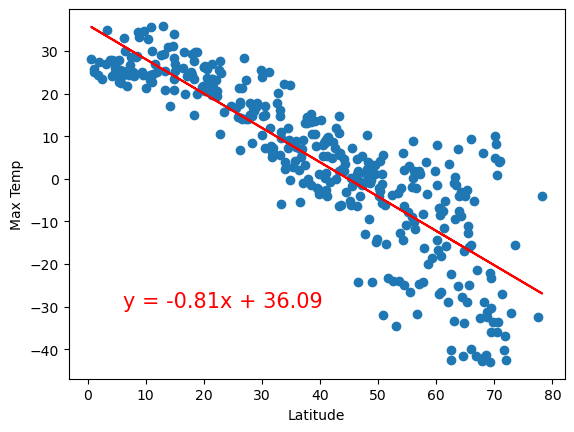

In [21]:
# Linear regression on Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (6, -30))

THe r-value is 0.10843358087887868


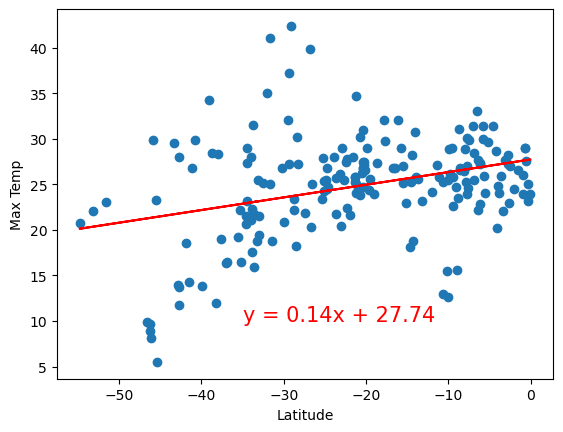

In [22]:
# Linear regression on Southern Hemisphere
x_value= southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Max Temp", (-35, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a negative correlation between maximum temperature and latitude in the northern hemisphere. The maximum temperature decreases as the latitude increases. There is a positive correlation between maximum temperature and latitude in the southern hemisphere since the maximum temperature increases as the latitude gets closer to 0.

### Humidity vs. Latitude Linear Regression Plot

THe r-value is 0.17212581822932133


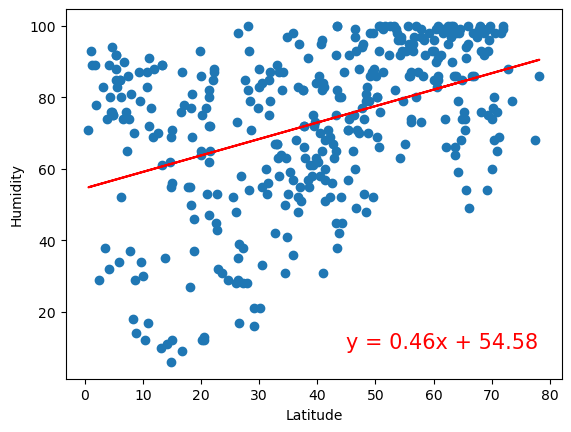

In [23]:
# Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (45, 10))

THe r-value is 0.14383972442406803


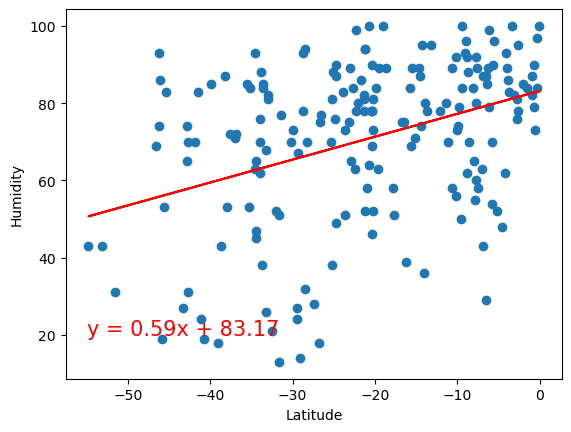

In [24]:
# Southern Hemisphere
x_value= southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, there is less correlation between humidity and latitude. In the southern hemisphere, there is no correlation between humidity and latitude. It is observed that the cities closer to the euqator have higher levels of humidity than cities further away from Latitude 0.

### Cloudiness vs. Latitude Linear Regression Plot

THe r-value is 0.02484514985672643


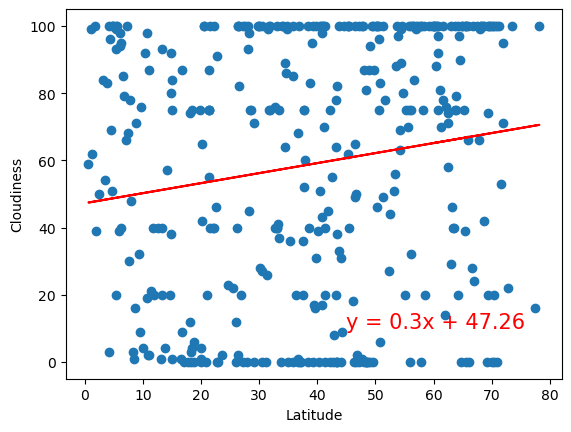

In [25]:
# Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (45, 10))

THe r-value is 0.09094990607637068


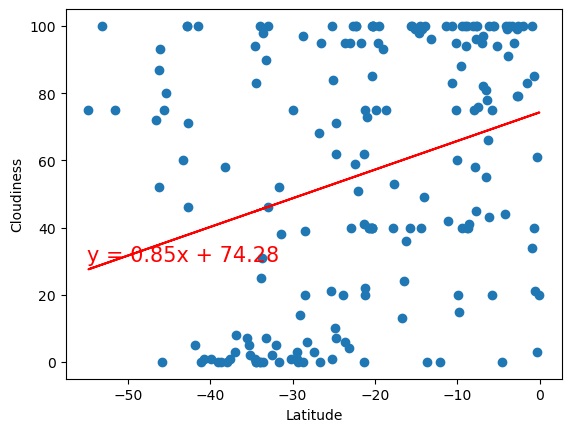

In [26]:
# Southern Hemisphere
x_value= southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (-55, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In both the hemispheres, there are no correlations between cloudiness and latitude as the cloudiness levels are widely spread out.

### Wind Speed vs. Latitude Linear Regression Plot

THe r-value is 0.015317485243900872


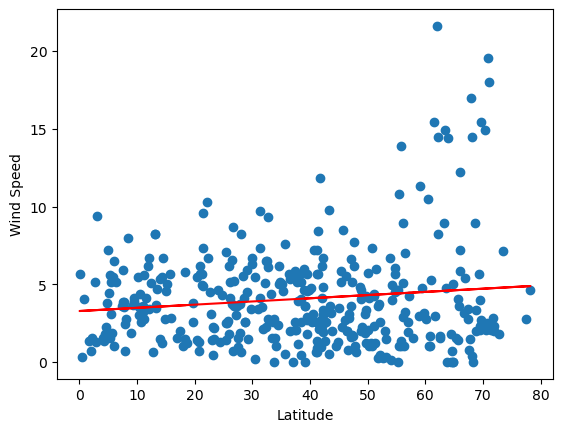

In [50]:
# Northern Hemisphere
x_value= northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (6, -10))

THe r-value is 0.07767362176600638


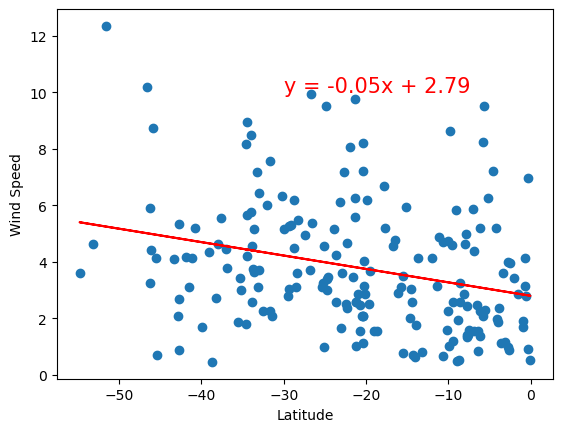

In [27]:
# Southern Hemisphere
x_value= southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (-30, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the northern hemisphere, there is no correlation between the wind speed and latitude.  In the southern hemipshere, there is a slight negative correlation between wind speed and latitude.